# Data load and cleaning

In [1]:
import pandas as pd

#load the data data_w_genres.csv
data_by_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_by_genres.csv')
#print data head
print(data_by_genres.head())

   mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  


In [2]:
# Check for missing values
print(data_by_genres.isnull().sum())

# Get a summary of the dataset
print(data_by_genres.describe())

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64
              mode  acousticness  danceability   duration_ms       energy  \
count  2973.000000   2973.000000   2973.000000  2.973000e+03  2973.000000   
mean      0.833165      0.401241      0.537187  2.517209e+05     0.561143   
std       0.372891      0.319760      0.150668  9.465686e+04     0.234486   
min       0.000000      0.000003      0.056900  3.094600e+04     0.001002   
25%       1.000000      0.119050      0.441202  2.063788e+05     0.395058   
50%       1.000000      0.321745      0.546496  2.375453e+05     0.601195   
75%       1.000000      0.673991      0.647500  2.772720e+05     0.730127   
max       1.000000      0.996000      0.929000  2.382587e+06   

In [3]:
import pandas as pd

data_by_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_by_genres.csv')

# Replace empty lists with the string 'Unknown'
data_by_genres['genres'] = data_by_genres['genres'].apply(lambda x: 'Unknown' if x == '[]' else x)

# Check again for empty lists
empty_lists = data_by_genres['genres'].apply(lambda x: x == 'Unknown').sum()
print(f"Number of 'Unknown' genre entries: {empty_lists}")

# check for [] values in genres column
print(data_by_genres['genres'].head())

Number of 'Unknown' genre entries: 1
0    21st century classical
1                     432hz
2                     8-bit
3                   Unknown
4                a cappella
Name: genres, dtype: object


# Data Standardization

In [6]:
#data standardization
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Feature to scale
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Apply the scaler to the features to scale
data_by_genres[features] = scaler.fit_transform(data_by_genres[features])

# Display the first five rows of the DataFrame
print(data_by_genres.head())


   mode                  genres  acousticness  danceability  duration_ms  \
0     1  21st century classical      1.808197     -2.484719    -0.966000   
1     1                   432hz      0.292578     -1.578931     8.423062   
2     1                   8-bit      1.128407      1.160449    -1.442757   
3     1                 Unknown      0.782518     -0.053735    -0.199068   
4     1              a cappella      0.861153      0.011776    -0.645517   

     energy  instrumentalness  liveness  loudness  speechiness     tempo  \
0 -2.089283          1.479575  1.828029 -3.912689    -0.534628 -2.500950   
1 -0.471170          0.996674 -0.669260 -1.181781    -0.084146  0.072537   
2  1.095589          2.486616 -0.723408  0.247722    -0.454680  0.825894   
3 -0.605666         -0.022662  0.280445 -0.331412     0.301775 -0.352759   
4 -1.043772         -0.779555 -0.222497 -0.366883    -0.009152 -0.395526   

    valence  popularity  key  
0 -1.927609   -0.721720    6  
1 -1.342996    0.751277 

Visualize the Scaled Features

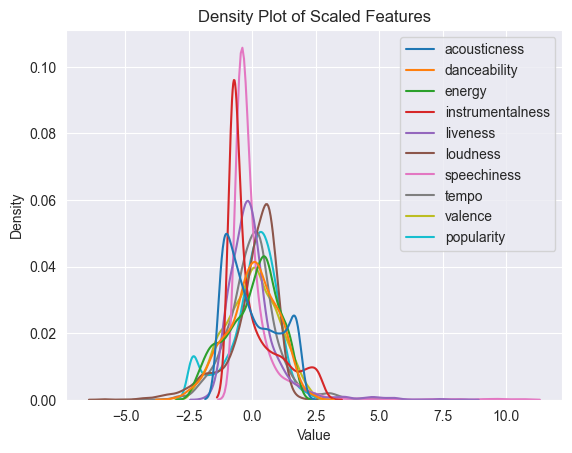

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the scaled features
sns.kdeplot(data=data_by_genres[features])
plt.title('Density Plot of Scaled Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


In [8]:
# Descriptive statistics
descriptive_stats = data_by_genres.describe()
print(descriptive_stats)

              mode  acousticness  danceability   duration_ms        energy  \
count  2973.000000  2.973000e+03   2973.000000  2.973000e+03  2.973000e+03   
mean      0.833165  1.911989e-17      0.000000 -2.115137e-16 -1.672990e-17   
std       0.372891  1.000168e+00      1.000168  1.000168e+00  1.000168e+00   
min       0.000000 -1.255020e+00     -3.188261 -2.332763e+00 -2.389202e+00   
25%       1.000000 -8.826548e-01     -0.637171 -4.790951e-01 -7.084090e-01   
50%       1.000000 -2.486526e-01      0.061790 -1.497821e-01  1.708391e-01   
75%       1.000000  8.531273e-01      0.732282  2.699798e-01  7.207800e-01   
max       1.000000  1.860328e+00      2.600946  2.251527e+01  1.849135e+00   

       instrumentalness     liveness      loudness   speechiness  \
count      2.973000e+03  2973.000000  2.973000e+03  2.973000e+03   
mean      -9.559943e-18     0.000000 -9.559943e-18  8.364950e-18   
std        1.000168e+00     1.000168  1.000168e+00  1.000168e+00   
min       -7.907920e-01  

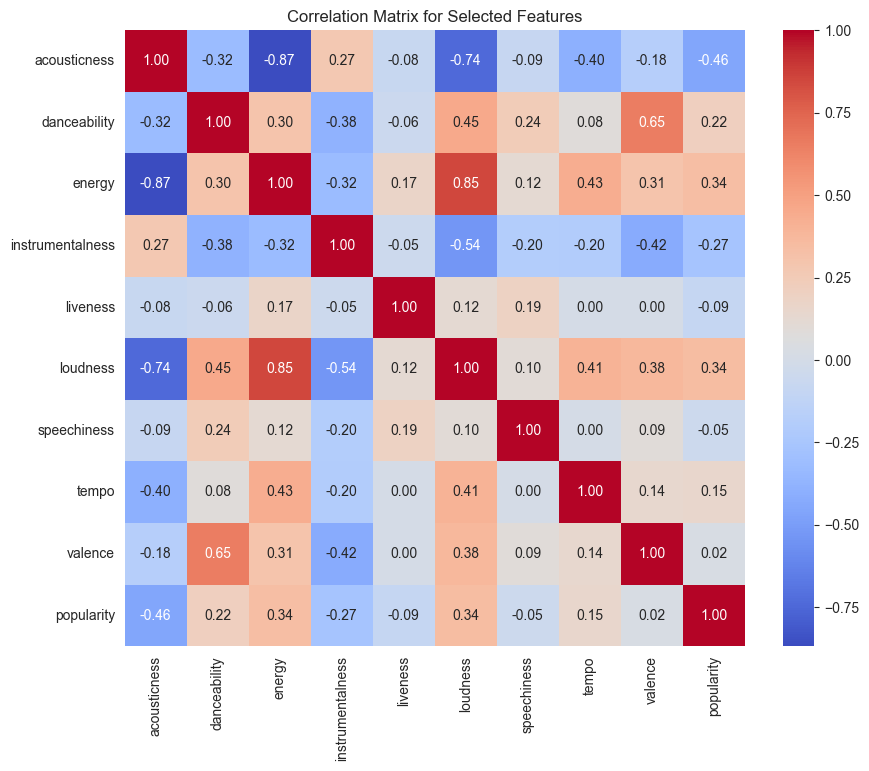

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Select only the specified features from the DataFrame
features_data = data_by_genres[features]

# Compute the correlation matrix
correlation_matrix = features_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()


Strong Positive Correlations (Red Tones)
Energy and Loudness (0.85): A strong positive correlation, suggesting that songs with higher energy tend to be louder. This is consistent with what one might expect as more energetic tracks are often mastered at higher volumes.
Danceability and Valence (0.65): Indicates that songs considered more danceable tend to be associated with happier moods (higher valence).
Energy and Popularity (0.34): A moderate positive correlation, suggesting that more energetic songs tend to be more popular. This might reflect current trends in music consumption.
Strong Negative Correlations (Blue Tones)
Acousticness and Energy (-0.87): A very strong negative correlation, implying that songs with higher acousticness tend to have lower energy. Acoustic tracks are often quieter and less driven by electronic instruments, which may account for less perceived energy.
Acousticness and Loudness (-0.74): This strong negative correlation aligns with the acousticness-energy relationship. Acoustic songs are typically softer and therefore quieter.
Acousticness and Popularity (-0.46): Suggests that more acoustic tracks are less popular. This could reflect a shift in popular music toward more produced and electronic sounds.
Moderate Correlations
Loudness and Popularity (0.34): Moderately suggesting that louder songs are somewhat more popular. This might be due to the production styles of popular music.
Danceability and Popularity (0.22): Indicates a moderate relationship between a song's danceability and its popularity.
Low or No Correlation (Pale Tones)
Several pairs of features such as Liveness and Speechiness (0.12), Instrumentalness and Tempo (-0.20), and others show low to no correlation, suggesting no strong linear relationship between these features.


Comparing Artists and Genres
Acousticness:

In both the artist and genre datasets, acousticness has a strong negative correlation with energy, which is consistent across both domains.
Acousticness has a stronger negative correlation with popularity in the artist dataset (-0.56) compared to the genre dataset (-0.21), suggesting that in the context of individual artists, acoustic music is less popular.
Danceability:

Danceability shows a positive correlation with valence in both datasets, which may indicate that regardless of whether we're considering genres or individual artists, danceable music tends to be more positive.
The correlation between danceability and energy is positive in both datasets, but more pronounced in the artist dataset (0.40 for artists vs. 0.31 for genres).
Energy:

There is a very strong positive correlation between energy and loudness in both datasets, which is expected as these features are often related in music production.
Energy's correlation with popularity is more pronounced in the artist dataset (0.42) than in the genre dataset (0.34), suggesting that for artists, producing energetic music might be a stronger factor in gaining popularity.
Instrumentalness:

The artist dataset shows a very weak positive correlation between instrumentalness and acousticness, while the genre dataset shows a negative correlation, suggesting that genres recognized for their instrumental content may not necessarily be the same ones recognized for acoustic qualities.
Loudness:

The strong positive correlation with energy is consistent across both datasets, while the correlation with danceability is more pronounced in the artist dataset.
Valence:

Valence shows a similar pattern in its correlation with danceability and energy in both datasets, reinforcing the idea that happier songs tend to be more danceable and energetic.
Popularity:

In the artist dataset, popularity has a moderate positive correlation with energy and a weaker positive correlation with danceability, whereas in the genre dataset, the correlations are not as strong.


In [12]:
from sklearn.preprocessing import StandardScaler

# feature selection for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = data_by_genres[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# PCA

from sklearn.decomposition import PCA

# Keep 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Number of components PCA chose after fitting the data
n_pca_components = X_pca.shape[1]
print(f"PCA optimal {n_pca_components}")

# print variance explained by each component
print(pca.explained_variance_ratio_)

# get the eigenvectors of the covariance matrix
loadings = (pca.components_)

# Create a DataFrame with the loadings and the feature names for better interpretability

loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=features)

print(loadings_df)

PCA optimal 7
[0.40450892 0.16066312 0.12980736 0.08743508 0.08172214 0.07117479
 0.03572096]
                       PC1       PC2       PC3       PC4       PC5       PC6  \
acousticness      0.421982  0.331809  0.021528 -0.080658  0.357076  0.031158   
danceability     -0.323972  0.500150 -0.105754 -0.006483 -0.245077  0.286245   
energy           -0.455869 -0.302899  0.038287 -0.023971 -0.237430 -0.006422   
instrumentalness  0.322360 -0.281802 -0.019942  0.028179 -0.484973  0.704288   
liveness         -0.072098 -0.121803  0.741343 -0.580220  0.172541  0.184018   
loudness         -0.476549 -0.131317 -0.025976 -0.081234 -0.071364 -0.205642   
speechiness      -0.121196  0.273638  0.614530  0.695348 -0.048457  0.067967   
tempo            -0.262290 -0.330844 -0.170870  0.278322  0.688770  0.468183   
valence          -0.299097  0.502172 -0.171409 -0.296406  0.096163  0.347942   

                       PC7  
acousticness     -0.061889  
danceability      0.668038  
energy           -

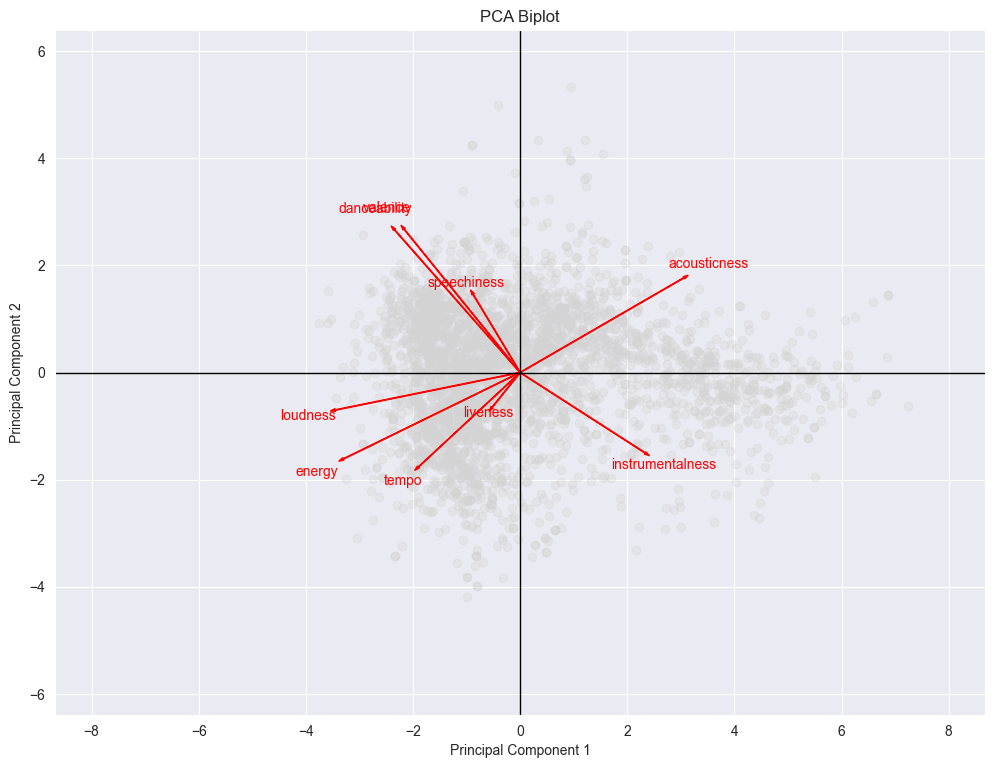

In [14]:
import matplotlib.pyplot as plt
import numpy as np

loadings2 = pca.components_[:2].T

loadings_df2 = pd.DataFrame(loadings2, columns=['PC1', 'PC2'], index=features)

# create the biplot
plt.figure(figsize=(12, 9))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, color='lightgrey')  

# Determine the maximum range of PCA scores
x_max, y_max = np.max(np.abs(X_pca[:, 0])), np.max(np.abs(X_pca[:, 1]))

# Plot each feature as a quiver plot (arrow) from the origin to the coordinate of the feature for the first two principal components (PC1 and PC2)
for i in range(loadings_df2.shape[0]):
    plt.arrow(0, 0,
              loadings_df2.iloc[i, 0] * x_max,  # Use .iloc here
              loadings_df2.iloc[i, 1] * y_max,  # Use .iloc here
              color='r', width=0.01, head_width=0.05, head_length=0.1, overhang=0.2)
    plt.text(loadings_df2.iloc[i, 0] * x_max * 1.15,  # Use .iloc here
             loadings_df2.iloc[i, 1] * y_max * 1.15,  # Use .iloc here
             loadings_df2.index[i], color='r', ha='center', va='center')

# Set limits for the plot
plt.xlim(-x_max*1.2, x_max*1.2)
plt.ylim(-y_max*1.2, y_max*1.2)

# Add labels and a title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Add gridlines for better readability
plt.grid(True)

# Add horizontal and vertical lines through the origin color them red for better readability
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Show the plot
plt.show()


For n_clusters = 2, the silhouette score is: 0.3396470081355459
For n_clusters = 3, the silhouette score is: 0.26529470742572553
For n_clusters = 4, the silhouette score is: 0.21441212275111426
For n_clusters = 5, the silhouette score is: 0.2093154062661808
For n_clusters = 6, the silhouette score is: 0.21524207067306417
For n_clusters = 7, the silhouette score is: 0.17554973701245472
For n_clusters = 8, the silhouette score is: 0.1739001497197668
For n_clusters = 9, the silhouette score is: 0.17906571272777372
For n_clusters = 10, the silhouette score is: 0.16658508045498735


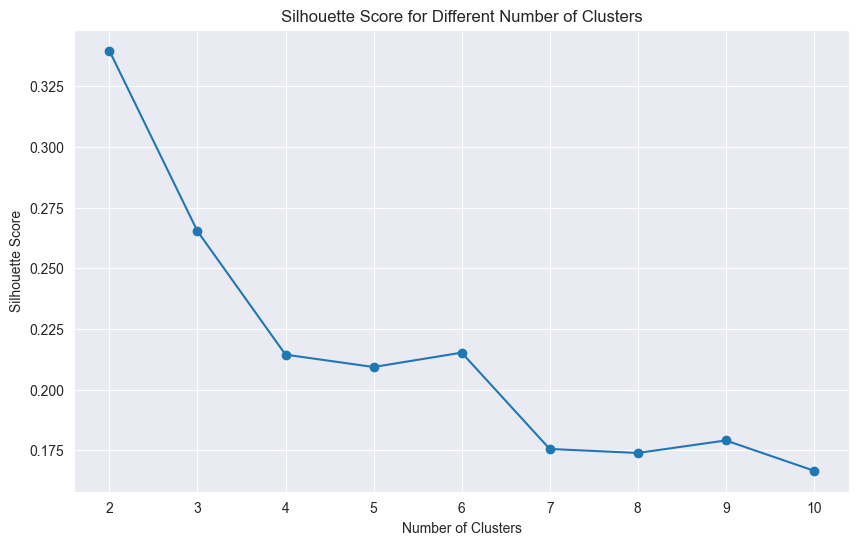

The optimal number of clusters is: 2


In [15]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of possible clusters to evaluate
range_n_clusters = list(range(2, 11))

silhouette_scores = []  # To store silhouette scores for each n_clusters

for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)  # Use PCA-reduced data
    
    # Calculate the silhouette score and append to list
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the silhouette score is: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_clusters}")


In [16]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Assuming you have the PCA-reduced data X_pca and cluster labels cluster_labels

# Calculate Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_pca, cluster_labels)
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_pca, cluster_labels)
print(f'Davies-Bouldin Index: {davies_bouldin}')


Calinski-Harabasz Index: 586.0451682949072
Davies-Bouldin Index: 1.4299905919462272


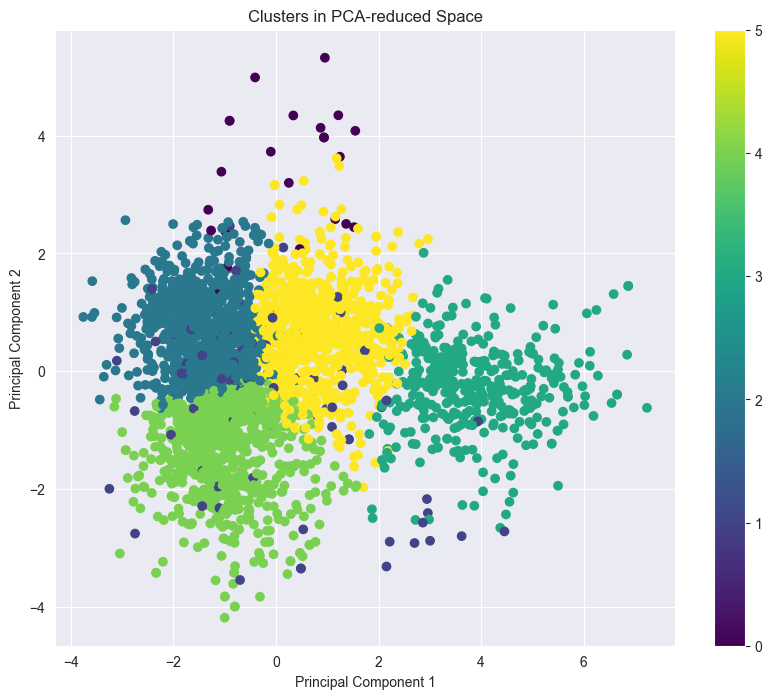

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
0            0.976157      0.455341 -0.821832         -0.705212  1.862158   
1            0.006496     -0.035638  0.196159          0.367133  3.559370   
2           -0.479763      0.912959  0.449690         -0.524971 -0.219061   
3            1.452331     -1.357522 -1.629482          1.449083 -0.424058   
4           -0.897312     -0.433316  0.908676          0.047492  0.127249   
5            0.788954     -0.018870 -0.700649         -0.153931 -0.149245   

         loudness  speechiness     tempo   valence  
cluster                                             
0       -1.202027     8.089083 -0.947916 -0.149673  
1        0.072909     0.158190 -0.286208 -0.023179  
2        0.505526     0.221575  0.026031  0.801364  
3       -1.931609    -0.399589 -0.846078 -1.296663  
4        0.641620    -0.096624  0.688740 -0.413747  
5       -0.3

In [17]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

# Choose the optimal number of clusters from silhouette analysis
optimal_num_clusters = 6

# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=10)
cluster_labels = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Clusters in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

# Profile the clusters

data_by_genres['cluster'] = cluster_labels  # add the cluster labels to your original dataset
cluster_profile = data_by_genres.groupby('cluster')[features].mean()  # calculate the mean of each feature for each cluster
print(cluster_profile)



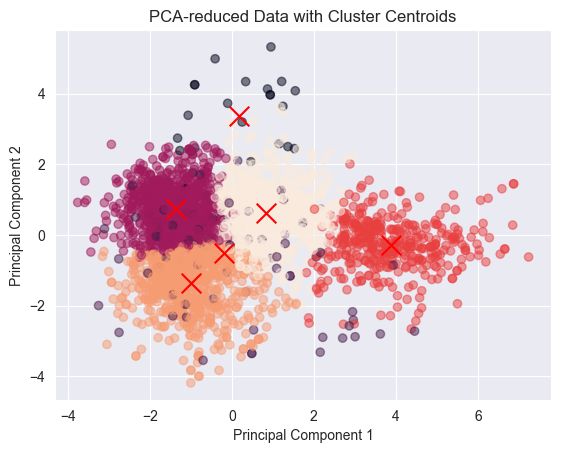

In [18]:
# Get centroids and plot them
centroids = kmeans.cluster_centers_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, alpha=0.5)  # The existing plot
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')  # Centroids
plt.title('PCA-reduced Data with Cluster Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


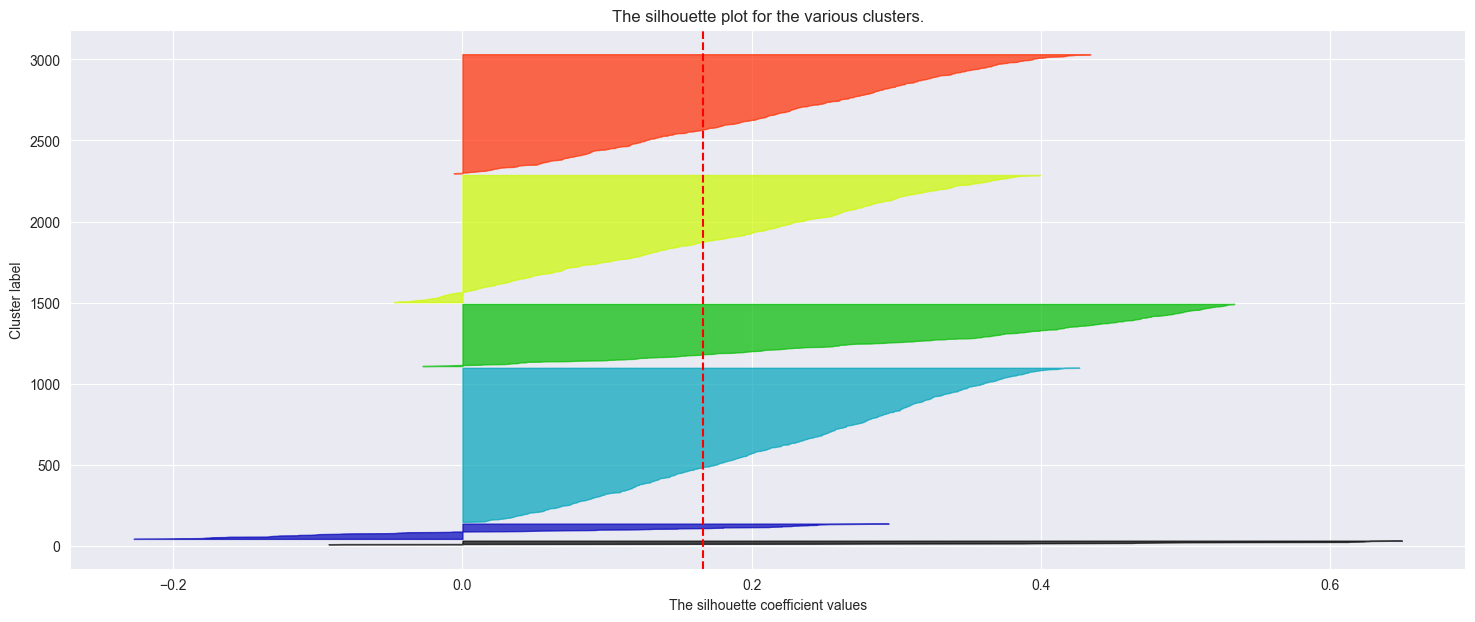

In [19]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Assuming silhouette_scores and cluster_labels are already computed

# Compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

y_lower = 10
for i in range(optimal_num_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / optimal_num_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()


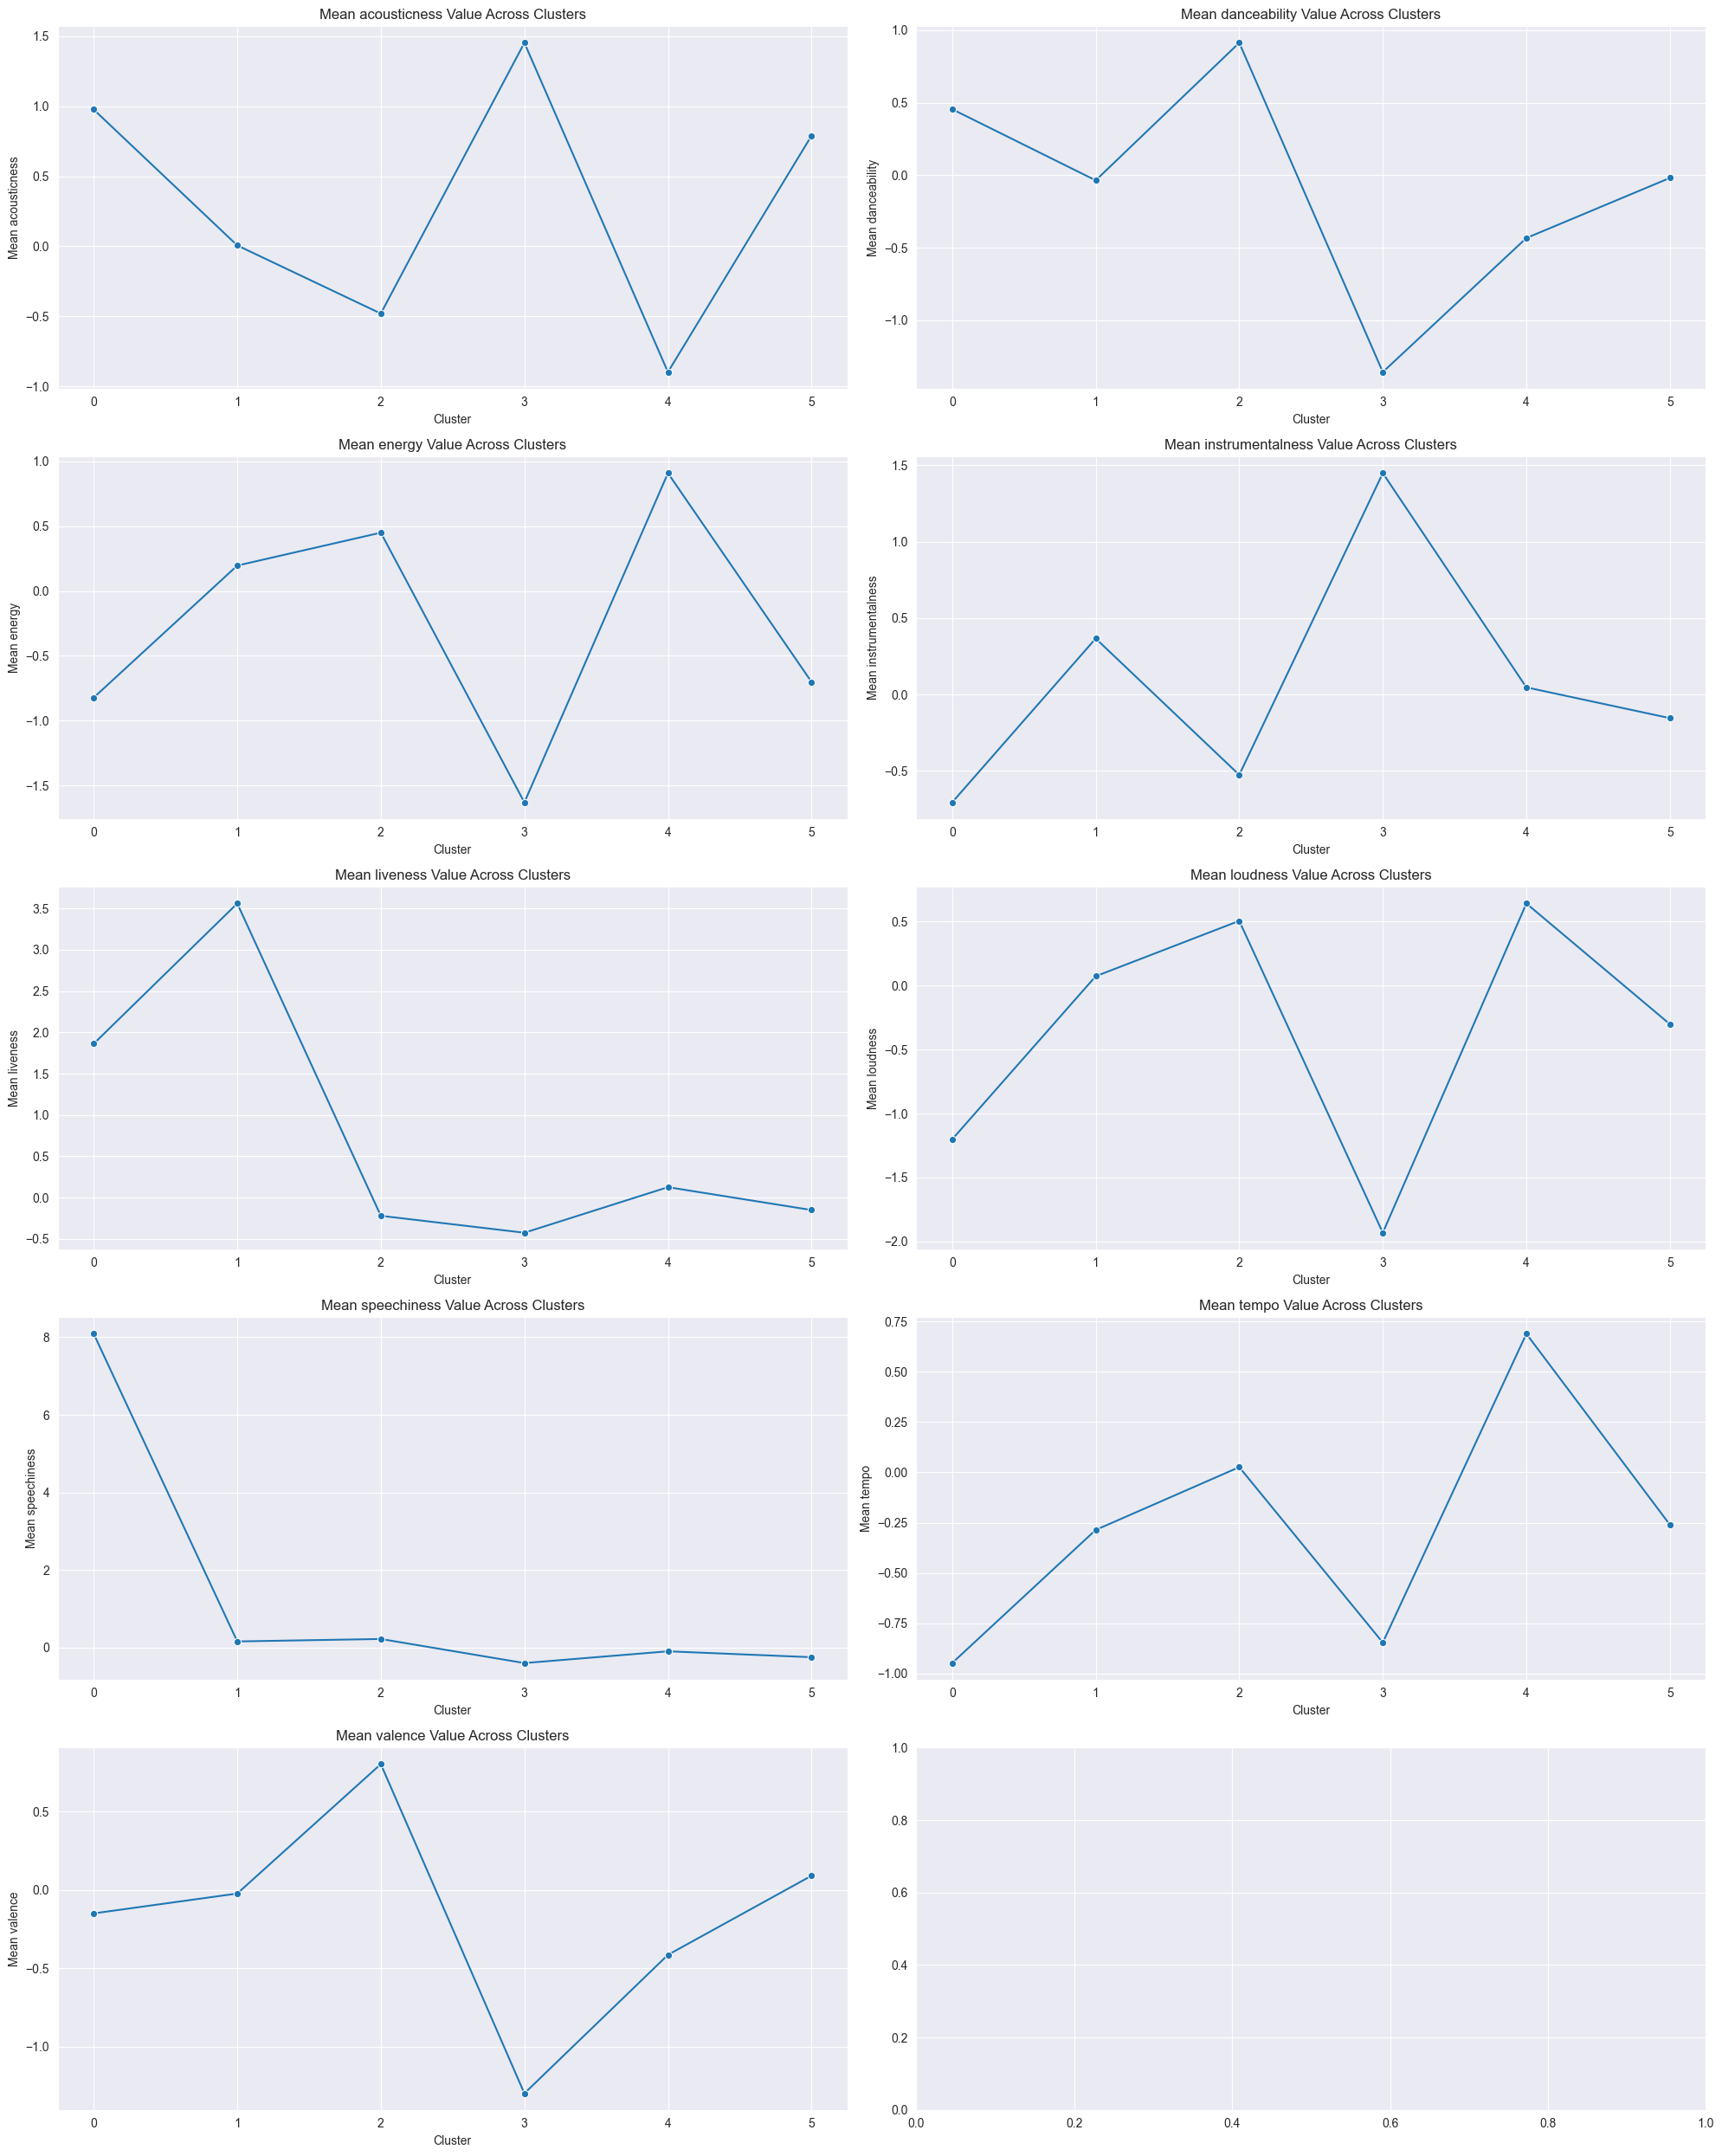

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot layout
n_rows = len(features) // 2 + len(features) % 2
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop over each feature to create a line plot for each
for i, feature in enumerate(features):
    # Create a new dataframe with the mean values of the feature for each cluster
    feature_means = data_by_genres.groupby('cluster')[feature].mean().reset_index()
    sns.lineplot(data=feature_means, x='cluster', y=feature, ax=axes[i], marker='o')
    axes[i].set_title(f'Mean {feature} Value Across Clusters')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(f'Mean {feature}')
    
# Adjust the layout
plt.tight_layout()
plt.show()




In [21]:
# automated cluster labeling
# Calculate the mean of each feature for each cluster

cluster_means = data_by_genres.groupby('cluster')[features].mean()

# Now, Normalize the feature values within each cluster and generate labels
feature_importance = cluster_means.apply(lambda row: row / row.sum(), axis=1)

for index, row in feature_importance.iterrows():
    top_features = row.sort_values(ascending=False).head(2).index.tolist()
    label = ' / '.join(top_features)
    print(f"Cluster {index} label suggestion: {label}")


Cluster 0 label suggestion: speechiness / liveness
Cluster 1 label suggestion: liveness / instrumentalness
Cluster 2 label suggestion: danceability / valence
Cluster 3 label suggestion: loudness / energy
Cluster 4 label suggestion: energy / tempo
Cluster 5 label suggestion: energy / loudness


In [22]:
import pandas as pd

# Define your cluster labels based on the discussion
cluster_labels = {
    0: "speechiness / liveness",
    1: "liveness / instrumentalness",
    2: "danceability / valence",
    3: "loudness / energy",
    4: "energy / tempo",
    5: "energy / loudness"

}

# Map the cluster numbers to the descriptive labels
data_by_genres['cluster_label'] = data_by_genres['cluster'].map(cluster_labels)


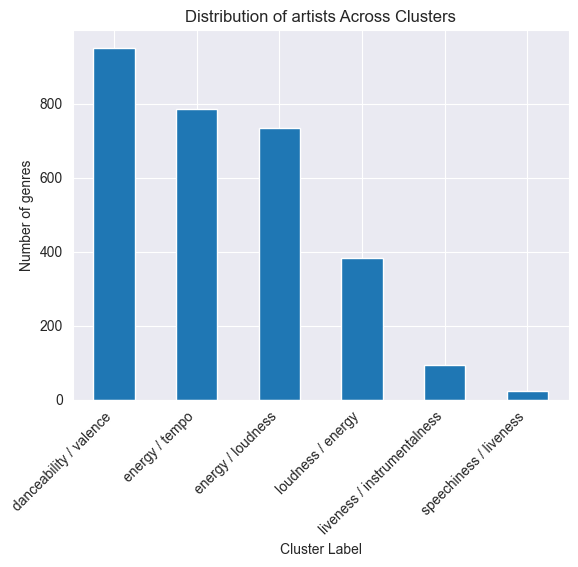

In [24]:
cluster_distribution = data_by_genres['cluster_label'].value_counts()

# Plotting the distribution
import matplotlib.pyplot as plt

cluster_distribution.plot(kind='bar')
plt.title('Distribution of artists Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of genres')
plt.xticks(rotation=45, ha="right")
plt.show()


In [27]:
import pandas as pd
import numpy as np

def recommend_genres(input_genres, data, num_recommendations=5):
    recommendations = {}
    
    for artist in input_genres:
        # Check if the artist is in the dataset
        if artist not in data['genres'].values:
            print(f"{artist} not found in the dataset.")
            recommendations[artist] = []
            continue
        
        # Get the cluster for the input artist
        artist_cluster = data[data['genres'] == artist]['cluster'].values
        if len(artist_cluster) > 0:
            cluster = artist_cluster[0]
            # Get other genres from the same cluster
            possible_recommendations = data[data['cluster'] == cluster]['genres'].tolist()
            # Remove the input artist from the recommendation list
            possible_recommendations = [a for a in possible_recommendations if a != artist]
            # Select a number of recommendations
            if len(possible_recommendations) < num_recommendations:
                recommendations[artist] = possible_recommendations
            else:
                recommendations[artist] = np.random.choice(possible_recommendations, num_recommendations, replace=False).tolist()
        else:
            # If the cluster is not found, add an empty list of recommendations
            recommendations[artist] = []
    
    return recommendations


# Example usage:
input_genres = ['pop', 'rock', 'country', 'tampa indie', 'rap', 'jazz']
recommendations = recommend_genres(input_genres, data_by_genres)
for input_artist, recs in recommendations.items():
    print(f"Recommendations for {input_artist}: {recs}")


Recommendations for pop: ['hyphy', 'vietnamese bolero', 'chihuahua indie', 'float house', 'trap triste']
Recommendations for rock: ['athens indie', 'melodic dubstep', 'progressive trance', 'auckland indie', 'brazilian metal']
Recommendations for country: ['ghanaian hip hop', 'knoxville indie', 'new jersey rap', 'nu-cumbia', 'scottish electronic']
Recommendations for tampa indie: ['comic metal', 'kawaii future bass', 'modern dream pop', 'pinoy rock', 'finnish alternative rock']
Recommendations for rap: ['traditional soul', 'italian indie pop', 'merengue', 'birmingham grime', 'salsa peruana']
Recommendations for jazz: ['oud', 'nuevo flamenco', 'trio cubano', 'jazz accordion', 'steel guitar']
